In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
CITY = "philadelphia"   #philadelphia or los_angeles

metrics = [
    "accuracy",
    "equality_discovery_prob",
    "equality_wellness"
]

ylimits = {
    "accuracy": (0.3, 1),
    "equality_discovery_prob": (0, 0.95),
    "equality_wellness": (5, 65)
}

filenames = [
    "df_fair",
    "df_random_uniform",
    "df_max_util",
    "df_steering",
]

COLORS = {
    "df_fair": "blue",
    "df_random_uniform": "green",
    "df_max_util": "red",
    "df_steering": "purple",
}

STEPS = 700

Plotting for city: philadelphia


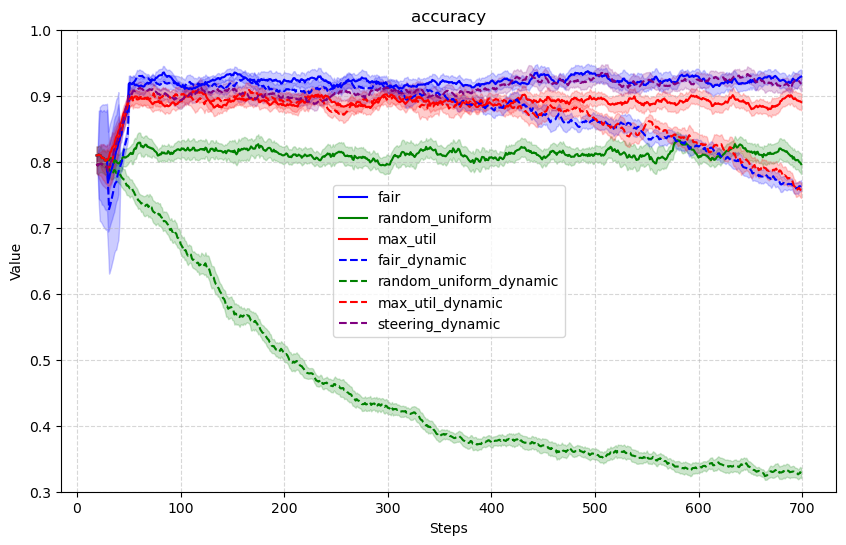

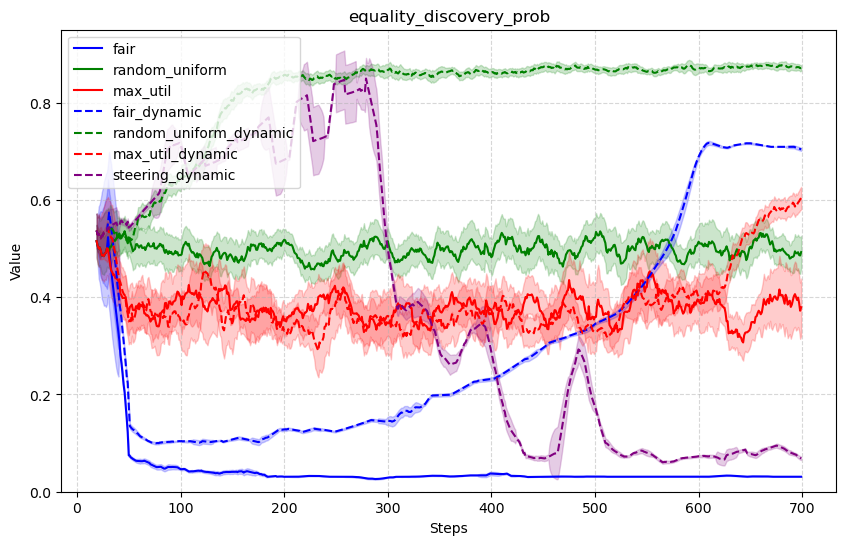

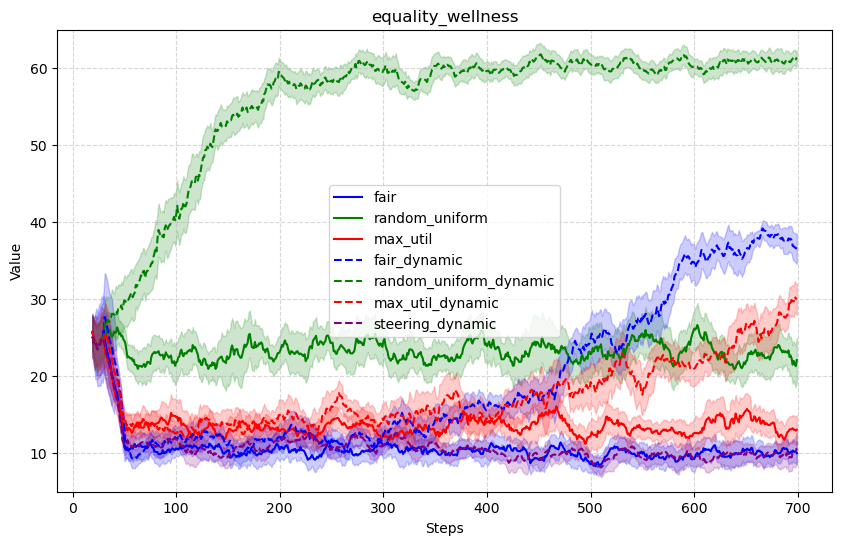

In [31]:
print(f"Plotting for city: {CITY}")

for metric in metrics:
    fig = plt.figure()

    if len(filenames) < 4 and metric == "accuracy":
        continue

    for filename in filenames:

        if filename != "df_steering":
            df = pd.read_pickle(f"./{CITY}/{filename}")
            column = df[metric][:STEPS]
            # apply moving average and plot
            mov_avg = column.rolling(window=20).mean()
            mov_std = column.rolling(window=20,center=True,min_periods=1).std()

            conf_int_pos = mov_avg + 1.96 * mov_std / np.sqrt(20)
            conf_int_neg = mov_avg - 1.96 * mov_std / np.sqrt(20)  

            plt.plot(np.arange(column.shape[0]), mov_avg, label=filename[3:], color=COLORS[filename])
            plt.fill_between(np.arange(column.shape[0]), conf_int_pos, conf_int_neg, color=COLORS[filename], alpha=0.2)

    for filename in filenames:
        filename2 = filename + "_dynamic"
        df = pd.read_pickle(f"./{CITY}/{filename2}")
        column = df[metric][:STEPS]
        # apply moving average and plot
        mov_avg = column.rolling(window=20).mean()
        mov_std = column.rolling(window=20,center=True,min_periods=1).std()

        conf_int_pos = mov_avg + 1.96 * mov_std / np.sqrt(20)
        conf_int_neg = mov_avg - 1.96 * mov_std / np.sqrt(20)  

        plt.plot(np.arange(column.shape[0]), mov_avg, label=filename2[3:], color=COLORS[filename], linestyle='--')
        plt.fill_between(np.arange(column.shape[0]), conf_int_pos, conf_int_neg, color=COLORS[filename], alpha=0.2)

    # Set the figure size
    fig.set_size_inches(10, 6)

    # Set the title and axis labels
    plt.title(metric)
    plt.xlabel('Steps')
    plt.ylabel('Value')

    plt.ylim(ylimits[metric])

    # Customize the grid
    plt.grid(True, linestyle='--', alpha=0.5)

    # Customize the legend
    plt.legend()

    # Show the plot
    plt.show()

    # Save the plot
    save_path = f"../images/{CITY}/{metric}_{'all' if len(filenames) >= 4 else 'partial'}.png"
    fig.savefig(save_path)